In [256]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [257]:
#from google.colab import drive
#drive.mount('/content/drive')

In [258]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

### Reading in data from various sensors stored in  csv files for airquality data
1. Get a list of all the filenames containing data from various sensors using the os python module.
2. Turn those into a list of dataframes using pandas

In [259]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [260]:
#airquality_data = combined_df
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'
#unit_name = 'Makindye'
#base_dir = os.path.join(base_dir, unit_name)

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Makerere')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')

airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
filepath= os.path.join(base_dir,'Mulago')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)')

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Rubaga_Mobile',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Rubaga_Mobile')

airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,11.27,15.52,40.13,18,0.2245,0.3999,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,14.87,20.51,54.50,19,0.2245,0.3999,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,20.77,29.18,70.89,20,0.2245,0.3999,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,22.54,31.99,81.10,21,0.2245,0.3999,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,22.37,31.85,78.94,22,0.2245,0.3999,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,23.46,32.23,74.90,23,0.2245,0.3999,90,0.0,87.77,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,23.61,32.53,67.31,0,0.2245,0.3999,91,0.0,87.74,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,21.78,29.90,56.56,1,0.2245,0.3999,91,0.0,87.67,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,18.13,24.95,45.56,2,0.2245,0.3999,89,0.0,87.63,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,15.81,21.78,38.09,3,0.2245,0.3999,89,0.0,87.59,...,19.78,0.69,1,0,0,0,0,0,0,0


In [261]:
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [262]:
#airquality_data = airquality_data.drop(['Hour'], axis=1)

In [263]:
airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,11.27,15.52,40.13,18,0.2245,0.3999,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,14.87,20.51,54.50,19,0.2245,0.3999,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,20.77,29.18,70.89,20,0.2245,0.3999,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,22.54,31.99,81.10,21,0.2245,0.3999,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,22.37,31.85,78.94,22,0.2245,0.3999,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [264]:
airquality_data.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-03-11 14:00:00,3.72,5.39,17.75,14,0.2073,0.3637,49,0.0,87.64,476.83,28.41,0.50,0,1,0,0,0,0,0,0
2019-03-11 15:00:00,3.30,4.78,13.96,15,0.2073,0.3637,45,0.0,87.55,667.62,29.34,0.94,0,0,0,0,0,0,1,0
2019-03-11 16:00:00,3.14,4.59,12.44,16,0.2073,0.3637,49,0.0,87.50,525.28,28.69,1.09,0,0,0,0,1,0,0,0
2019-03-11 17:00:00,3.62,5.13,13.06,17,0.2073,0.3637,52,0.0,87.51,305.62,27.42,1.19,0,0,0,0,1,0,0,0
2019-03-11 18:00:00,2.94,4.47,11.57,18,0.2073,0.3637,59,0.0,87.52,75.15,26.14,0.83,0,0,0,0,1,0,0,0


In [265]:
show_dataframe_info(airquality_data)

(12000, 20)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'EVI', 'NDVI', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12000 entries, 2017-09-09 18:00:00 to 2019-03-11 18:00:00
Data columns (total 20 columns):
PM1(Ug/m3)            12000 non-null float64
PM2.5(Ug/m3)          12000 non-null float64
PM10(Ug/m3)           12000 non-null float64
hour                  12000 non-null int64
EVI                   12000 non-null float64
NDVI                  12000 non-null float64
humidity (%)          12000 non-null int64
precipitation (mm)    12000 non-null float64
pressure (kPa)        12000 non-null float64
radiation (W/m2)      12000 non-null float64
temperature (oC)      12000 non-null float64
windspeed (m/

In [266]:
airquality_data.describe()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,13.540177,18.835673,43.560323,11.496000,0.234250,0.409090,-107.744667,0.132941,87.678892,154.812255,22.495915,-105.679550,0.102583,0.062417,0.071167,0.098250,0.211917,0.225083,0.125000,0.103583
std,7.964570,10.838085,24.116789,6.921607,0.048602,0.067086,1357.983267,1.229351,0.182687,229.215247,3.442575,1027.211358,0.303427,0.241921,0.257114,0.297665,0.408683,0.417655,0.330733,0.304732
min,0.000000,0.010000,0.010000,0.000000,0.157100,0.283200,-9998.000000,0.000000,87.060000,0.000000,15.470000,-9998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.530000,10.380000,26.580000,5.000000,0.207300,0.363700,66.000000,0.000000,87.550000,0.000000,19.810000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.090000,19.480000,38.090000,11.000000,0.224500,0.400800,82.000000,0.000000,87.680000,3.515000,21.480000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.822500,26.260000,56.560000,17.000000,0.262600,0.430900,91.000000,0.000000,87.810000,269.300000,25.050000,1.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,140.010000,172.250000,415.160000,23.000000,0.330400,0.548200,100.000000,46.230000,88.200000,1049.080000,33.370000,36.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate Features From the Target

In [267]:
#target_column = 'PM2.5(Ug/m3)'
#feature_columns = [x for x in airquality_data.columns if x != target_column]
feature_columns = [0,2, 3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19]
target_column = [1]
features = airquality_data.iloc[:,feature_columns]
targets = airquality_data.iloc[:,target_column]

In [268]:
features.head()

,PM1(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,11.27,40.13,18,0.2245,0.3999,73,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,14.87,54.50,19,0.2245,0.3999,77,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,20.77,70.89,20,0.2245,0.3999,80,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,22.54,81.10,21,0.2245,0.3999,82,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,22.37,78.94,22,0.2245,0.3999,87,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [269]:
targets.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,15.52
2017-09-09 19:00:00,20.51
2017-09-09 20:00:00,29.18
2017-09-09 21:00:00,31.99
2017-09-09 22:00:00,31.85



### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [270]:
training_data = len(airquality_data)
print(training_data)

training_data_length = math.floor(len(airquality_data)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

12000
8400
1200
2400
12000


In [271]:
training_features = features.iloc[0:training_data_length,:]
print(training_features.shape)
training_targets =  targets.iloc[0:training_data_length,:]
print(training_targets.shape)

validation_features = features.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_features.shape)
validation_targets =  targets.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_targets.shape)

testing_features = features.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_features.shape)

testing_targets = targets.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_targets.shape)

(8400, 18)
(8400, 1)
(1200, 18)
(1200, 1)
(2400, 18)
(2400, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

### given data that goes back 3hrs, can we predict the next hour.

### training dataset

In [272]:
scaler = MinMaxScaler()
scaled_training_features = scaler.fit_transform(training_features)
print(scaled_training_features)
print(scaled_training_features.shape)

training_targets =  np.array(training_targets)
training_targets = training_targets.reshape(-1,1)
print('trainging target shape: ', training_targets.shape)

##given data that goes back 3hrs, can we predict the next hour.
forecasters = [] 
pollution_real = [] 
for i in range(3, scaled_training_features.shape[0]):
    forecasters.append(scaled_training_features[i-3:i, 0:18])
    pollution_real.append(training_targets[i, 0])
    
forecasters, pollution_real = np.array(forecasters), np.array(pollution_real)

print(pollution_real.shape)
print(forecasters.shape)
print(forecasters.shape[1])

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[[0.08049425 0.09663977 0.7826087  ... 1.         0.         0.        ]
 [0.1062067  0.13125376 0.82608696 ... 0.         0.         0.        ]
 [0.14834655 0.17073347 0.86956522 ... 1.         0.         0.        ]
 ...
 [0.05035355 0.08813682 0.69565217 ... 1.         0.         0.        ]
 [0.0584244  0.07235939 0.73913043 ... 0.         0.         0.        ]
 [0.08049425 0.09663977 0.7826087  ... 0.         0.         0.        ]]
(8400, 18)
trainging target shape:  (8400, 1)
(8397,)
(8397, 3, 18)
3


### validation dataset

In [273]:
scaled_validation_features = scaler.fit_transform(validation_features)
print(scaled_validation_features)
forecasters_validation = [] 
pollution_real_validation = [] 

validation_targets =  np.array(validation_targets)
validation_targets= validation_targets.reshape(-1,1)
print(validation_targets.shape)

for i in range(3, scaled_validation_features.shape[0]):
    forecasters_validation.append(scaled_validation_features[i-3:i, 0:18])
    pollution_real_validation.append(validation_targets[i, 0])
    
forecasters_validation, pollution_real_validation = np.array(forecasters_validation), np.array(pollution_real_validation)
#baseline_prediction_validation_values, baseline_actual_validation_values = np.array(baseline_prediction_validation_values),
#np.array(baseline_actual_validation_values)
print(forecasters_validation.shape)
print(pollution_real_validation.shape)

[[0.54612403 0.54593121 0.82608696 ... 1.         0.         0.        ]
 [0.7748062  0.71780621 0.86956522 ... 0.         1.         0.        ]
 [0.84341085 0.82487416 0.91304348 ... 0.         0.         0.        ]
 ...
 [0.47015504 0.31061242 0.69565217 ... 1.         0.         0.        ]
 [0.30968992 0.27286074 0.73913043 ... 1.         0.         0.        ]
 [0.40658915 0.39523909 0.7826087  ... 1.         0.         0.        ]]
(1200, 1)
(1197, 3, 18)
(1197,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Testing dataset

In [274]:
scaled_testing_features = scaler.fit_transform(testing_features)
print(scaled_testing_features)
forecasters_test = [] 
pollution_real_test = [] 

testing_targets =  np.array(testing_targets)
testing_y_values = testing_targets
testing_targets = testing_targets.reshape(-1,1)
print('Testing Y values shape: ',testing_y_values.ravel().shape)
print('Testing targets shape: ',testing_targets.shape)

for i in range(3, scaled_testing_features.shape[0]):
    forecasters_test.append(scaled_testing_features[i-3:i, 0:18])
    pollution_real_test.append(testing_targets[i, 0])
    
forecasters_test, pollution_real_test = np.array(forecasters_test), np.array(pollution_real_test)

print(forecasters_test.shape)
print(pollution_real_test.shape)

[[0.41256831 0.40527963 0.82608696 ... 1.         0.         0.        ]
 [0.59168185 0.5367889  0.86956522 ... 1.         0.         0.        ]
 [0.64541591 0.61871139 0.91304348 ... 1.         0.         0.        ]
 ...
 [0.0564663  0.06780069 0.69565217 ... 0.         0.         0.        ]
 [0.07103825 0.07277542 0.73913043 ... 0.         0.         0.        ]
 [0.05039466 0.06082003 0.7826087  ... 0.         0.         0.        ]]
Testing Y values shape:  (2400,)
Testing targets shape:  (2400, 1)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(2397, 3, 18)
(2397,)


### Building Baseline Model
- for Baseline, we predict the average pm2.5 and check the RMSE on validation data. Any model, should be able to beat this simple benchmark
- The airquality(pm25) timeseries are continuous (the pm25 conncentration in the next hour are likely to be close to the pm25 concentration at the current hour).
- Thus a common sense approach would be to always predict that the pm25 concentrations right now  will be equal to the pm25 concentration 1hr hour ago. Let's evaluate this approach, using the Mean Absolute Error metric (MAE). Mean Absolute Error is simply equal to: np.mean(np.abs(preds - targets))

In [275]:
def evaluate_naive_method():
    baseline_prediction_validation_values = []
    baseline_actual_validation_values = []
    
    #3 is the number of timesteps back.
    for i in range(3, scaled_validation_features.shape[0]):
        if i != 3:
            baseline_prediction_validation_values.append(validation_targets[i-1, 0])
            baseline_actual_validation_values.append(validation_targets[i, 0])

    baseline_prediction_validation_values = np.array(baseline_prediction_validation_values)
    baseline_actual_validation_values = np.array(baseline_actual_validation_values)

    baseline_maes = []
    baseline_rmses = []
    
    for i in range(0,len(baseline_prediction_validation_values)):
        mae = np.mean(np.abs(baseline_prediction_validation_values[i] - baseline_actual_validation_values[i]))
        baseline_maes.append(mae)
    
    print(np.mean(baseline_maes))
    
evaluate_naive_method()

def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

#def rmse(ytrue, ypredicted):
    #return np.sqrt(mean_squared_error(ytrue, ypredicted))

#calculate_rmse(baseline_actual_validation_values, baseline_prediction_validation_values)

3.50945652173913


In [276]:
validation_features.shape

(1200, 18)

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [277]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[ 76.60918701 107.96292788 117.88683464 ...  10.67400821  13.25088726
   9.86735528]


In [278]:
svr_mae = mean_absolute_error(testing_targets, svr_predictions)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets, svr_predictions)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':svr_predictions}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  51.68
SVR RMSE:  58.48


### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [279]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
 

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

model = Sequential()
model.add(LSTM(32, input_shape = (forecasters.shape[1],18)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error', rmse])
basic_model_history = model.fit(forecasters, pollution_real, epochs=100, validation_data=(forecasters_validation,pollution_real_validation))

Train on 8397 samples, validate on 1197 samples
Epoch 1/100
8397/8397 [==============================] - 16s 2ms/step - loss: 229.2587 - mean_absolute_error: 11.3804 - rmse: 14.4501 - val_loss: 116.7579 - val_mean_absolute_error: 9.5019 - val_rmse: 10.7683
Epoch 2/100
8397/8397 [==============================] - 2s 193us/step - loss: 131.5490 - mean_absolute_error: 8.6576 - rmse: 11.0616 - val_loss: 104.8773 - val_mean_absolute_error: 8.8756 - val_rmse: 10.1733
Epoch 3/100
8397/8397 [==============================] - 2s 184us/step - loss: 126.7644 - mean_absolute_error: 8.5072 - rmse: 10.8474 - val_loss: 91.4685 - val_mean_absolute_error: 8.2158 - val_rmse: 9.5049
Epoch 4/100
8397/8397 [==============================] - 2s 182us/step - loss: 99.2164 - mean_absolute_error: 6.8625 - rmse: 9.4087 - val_loss: 63.2644 - val_mean_absolute_error: 6.5075 - val_rmse: 7.8822
Epoch 5/100
8397/8397 [==============================] - 1s 179us/step - loss: 78.5017 - mean_absolute_error: 5.6639 - rms

8397/8397 [==============================] - 2s 189us/step - loss: 40.5384 - mean_absolute_error: 3.4746 - rmse: 5.6579 - val_loss: 966.2509 - val_mean_absolute_error: 28.6577 - val_rmse: 31.0131
Epoch 41/100
8397/8397 [==============================] - 1s 177us/step - loss: 40.0819 - mean_absolute_error: 3.4404 - rmse: 5.6691 - val_loss: 1001.2090 - val_mean_absolute_error: 29.2026 - val_rmse: 31.5688
Epoch 42/100
8397/8397 [==============================] - 2s 191us/step - loss: 39.9852 - mean_absolute_error: 3.4422 - rmse: 5.6666 - val_loss: 1000.8301 - val_mean_absolute_error: 29.1318 - val_rmse: 31.5629
Epoch 43/100
8397/8397 [==============================] - 2s 193us/step - loss: 39.9278 - mean_absolute_error: 3.4436 - rmse: 5.6839 - val_loss: 1027.5377 - val_mean_absolute_error: 29.4803 - val_rmse: 31.9800
Epoch 44/100
8397/8397 [==============================] - 2s 190us/step - loss: 39.7697 - mean_absolute_error: 3.4272 - rmse: 5.6182 - val_loss: 1071.6925 - val_mean_absolute

Epoch 79/100
8397/8397 [==============================] - 2s 182us/step - loss: 35.2428 - mean_absolute_error: 3.2054 - rmse: 5.3023 - val_loss: 1610.0554 - val_mean_absolute_error: 36.6260 - val_rmse: 40.0118
Epoch 80/100
8397/8397 [==============================] - 2s 198us/step - loss: 35.2606 - mean_absolute_error: 3.2220 - rmse: 5.3237 - val_loss: 1578.1275 - val_mean_absolute_error: 36.0795 - val_rmse: 39.6085
Epoch 81/100
8397/8397 [==============================] - 2s 190us/step - loss: 35.3113 - mean_absolute_error: 3.2328 - rmse: 5.3324 - val_loss: 1565.9109 - val_mean_absolute_error: 35.9172 - val_rmse: 39.4506
Epoch 82/100
8397/8397 [==============================] - 1s 174us/step - loss: 35.0137 - mean_absolute_error: 3.2036 - rmse: 5.3192 - val_loss: 1580.4704 - val_mean_absolute_error: 36.0202 - val_rmse: 39.6322
Epoch 83/100
8397/8397 [==============================] - 2s 188us/step - loss: 35.1048 - mean_absolute_error: 3.2361 - rmse: 5.3171 - val_loss: 1629.8177 - val

In [280]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_41 (LSTM)               (None, 32)                6528      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 33        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


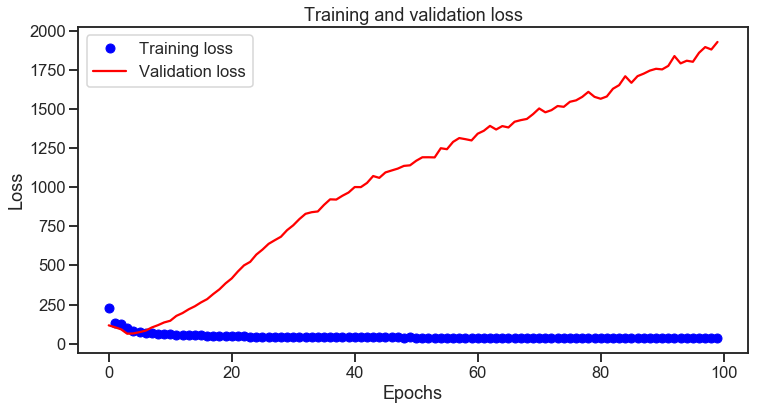

In [281]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [282]:
print(np.argmin(val_loss))
#val_loss[70]

3


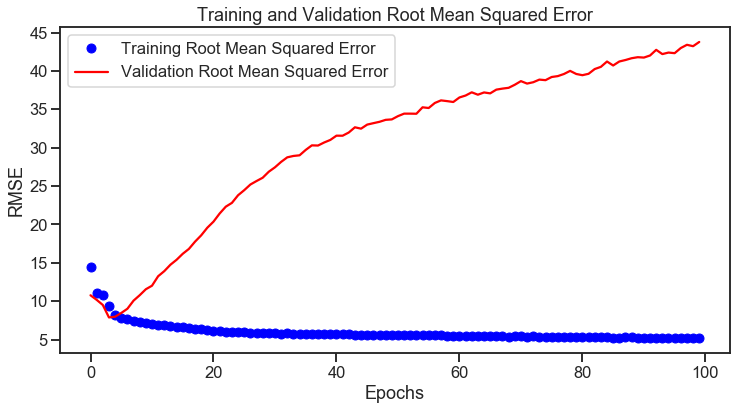

In [283]:
hist_rmse = basic_model_history.history['rmse']
val_rmse = basic_model_history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Squared Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Squared Error')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

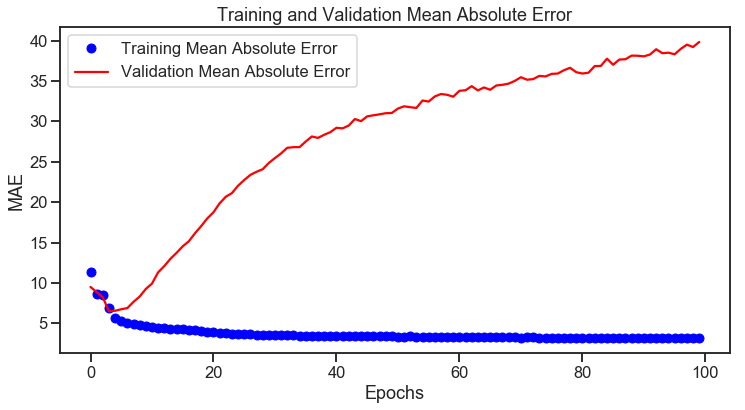

In [284]:
mae = basic_model_history.history['mean_absolute_error']
val_mae = basic_model_history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [285]:
basic_lstm_model_predictions = model.predict(forecasters_test)
basic_lstm_model_evaluation =  model.evaluate(forecasters_test, pollution_real_test)
print(basic_lstm_model_evaluation)
print(model.metrics_names)

2397/2397 [==============================] - 0s 71us/step
[1361.057802966599, 33.165930531151254, 36.768707272207735]
['loss', 'mean_absolute_error', 'rmse']


In [286]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(2397, 1)
(2397,)


In [287]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':basic_lstm_model_predictions.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Creation Neural Network Architecture,Training & Evaluation  On Recurrent LSTM and DROPOUT layers
The last parameter with the value 18 represents, the number of features

In [288]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regressor_model = Sequential()
regressor_model.add(LSTM(units=100, return_sequences = True, input_shape = (forecasters.shape[1],18)))
regressor_model.add(Dropout(0.3))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50))
regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error',rmse] )

##Training the model
history = regressor_model.fit(forecasters, pollution_real,epochs = 100,
                              validation_data=(forecasters_validation,pollution_real_validation),batch_size = 32)

Train on 8397 samples, validate on 1197 samples
Epoch 1/100
8397/8397 [==============================] - 27s 3ms/step - loss: 188.8174 - mean_absolute_error: 10.2053 - rmse: 13.0197 - val_loss: 106.1450 - val_mean_absolute_error: 8.9617 - val_rmse: 10.2401
Epoch 2/100
8397/8397 [==============================] - 9s 1ms/step - loss: 129.9080 - mean_absolute_error: 8.6261 - rmse: 10.9793 - val_loss: 105.0639 - val_mean_absolute_error: 8.8117 - val_rmse: 10.1724
Epoch 3/100
8397/8397 [==============================] - 9s 1ms/step - loss: 130.1178 - mean_absolute_error: 8.6404 - rmse: 11.0193 - val_loss: 104.7271 - val_mean_absolute_error: 8.8486 - val_rmse: 10.1631
Epoch 4/100
8397/8397 [==============================] - 9s 1ms/step - loss: 111.0748 - mean_absolute_error: 7.5023 - rmse: 10.0310 - val_loss: 58.8934 - val_mean_absolute_error: 6.3320 - val_rmse: 7.6069
Epoch 5/100
8397/8397 [==============================] - 9s 1ms/step - loss: 74.7043 - mean_absolute_error: 5.4948 - rmse: 8

8397/8397 [==============================] - 9s 1ms/step - loss: 41.5892 - mean_absolute_error: 3.7088 - rmse: 5.8359 - val_loss: 738.0178 - val_mean_absolute_error: 25.1016 - val_rmse: 27.0928ute_er - ETA: 2s - loss: 43.7228 - mean_absol
Epoch 40/100
8397/8397 [==============================] - 9s 1ms/step - loss: 41.4071 - mean_absolute_error: 3.7141 - rmse: 5.8120 - val_loss: 801.3262 - val_mean_absolute_error: 26.1653 - val_rmse: 28.2170
Epoch 41/100
8397/8397 [==============================] - 9s 1ms/step - loss: 40.0838 - mean_absolute_error: 3.6712 - rmse: 5.7466 - val_loss: 908.4195 - val_mean_absolute_error: 27.9775 - val_rmse: 30.0306
Epoch 42/100
8397/8397 [==============================] - 9s 1ms/step - loss: 41.0307 - mean_absolute_error: 3.6925 - rmse: 5.7559 - val_loss: 919.8236 - val_mean_absolute_error: 27.9326 - val_rmse: 30.2278
Epoch 43/100
8397/8397 [==============================] - 9s 1ms/step - loss: 41.2257 - mean_absolute_error: 3.6795 - rmse: 5.7978 - val_los

Epoch 78/100
8397/8397 [==============================] - 9s 1ms/step - loss: 31.4997 - mean_absolute_error: 3.3039 - rmse: 5.1509 - val_loss: 1689.3522 - val_mean_absolute_error: 36.7128 - val_rmse: 40.9824
Epoch 79/100
8397/8397 [==============================] - 10s 1ms/step - loss: 31.3348 - mean_absolute_error: 3.3026 - rmse: 5.1554 - val_loss: 1702.4875 - val_mean_absolute_error: 36.9464 - val_rmse: 41.1060
Epoch 80/100
8397/8397 [==============================] - 10s 1ms/step - loss: 31.2710 - mean_absolute_error: 3.3053 - rmse: 5.1374 - val_loss: 1802.9446 - val_mean_absolute_error: 37.6197 - val_rmse: 42.3424
Epoch 81/100
8397/8397 [==============================] - 9s 1ms/step - loss: 31.3154 - mean_absolute_error: 3.2975 - rmse: 5.1257 - val_loss: 1832.7371 - val_mean_absolute_error: 38.3209 - val_rmse: 42.6716 - mean_absolute_error: 3.3066 - rmse:
Epoch 82/100
8397/8397 [==============================] - 10s 1ms/step - loss: 30.4276 - mean_absolute_error: 3.2107 - rmse: 5.0

In [289]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')

regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_42 (LSTM)               (None, 3, 100)            47600     
_________________________________________________________________
dropout_28 (Dropout)         (None, 3, 100)            0         
_________________________________________________________________
lstm_43 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
dropout_29 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
dropout_30 (Dropout)         (None, 3, 50)             0         
_________________________________________________________________
lstm_45 (LSTM)               (None, 50)                20200     
__________

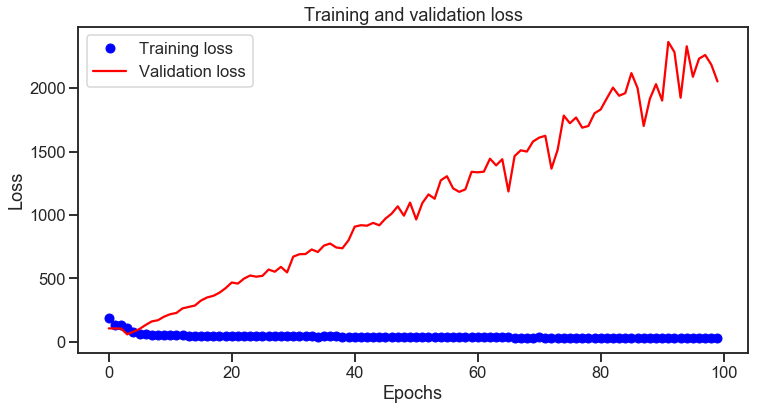

In [290]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig_deep_lstm_loss= plt.figure(figsize=(12,6))
ax = fig_deep_lstm_loss.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig_deep_lstm_loss.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_mae.png'))

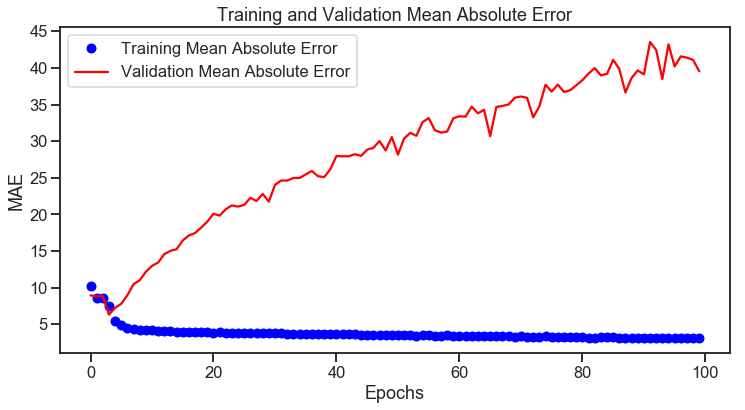

In [291]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_deep_lstm_mae = plt.figure(figsize=(12,6))
ax_mae = fig_deep_lstm_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [292]:
deep_lstm_model_predictions = regressor_model.predict(forecasters_test)
deep_lstm_model_evaluation =  regressor_model.evaluate(forecasters_test, pollution_real_test)

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

2397/2397 [==============================] - 0s 202us/step


In [293]:
#print(forecasters_test.shape)
print(deep_lstm_model_predictions.shape)

(2397, 1)


In [294]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 53.98133
actual pm2.5 values 19.495219023779725


### Verification of the average in the results of the forecasts and in the actual results

In [295]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 53.98133
actual pm2.5 values 19.495219023779725


### Visualization of the predictions and actual values of PM2.5
1. #### using bar chart

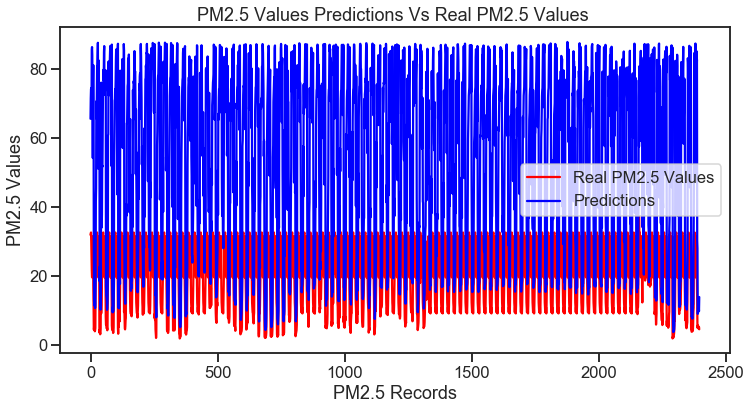

In [296]:
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predictions')
plt.title('PM2.5 Values Predictions Vs Real PM2.5 Values ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))

### 2. using line graphs

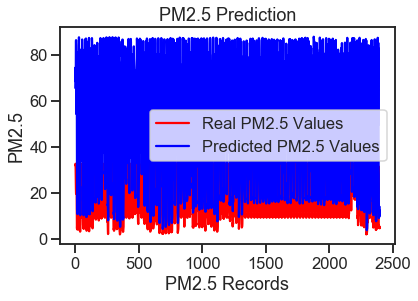

In [297]:
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('PM2.5 Prediction')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

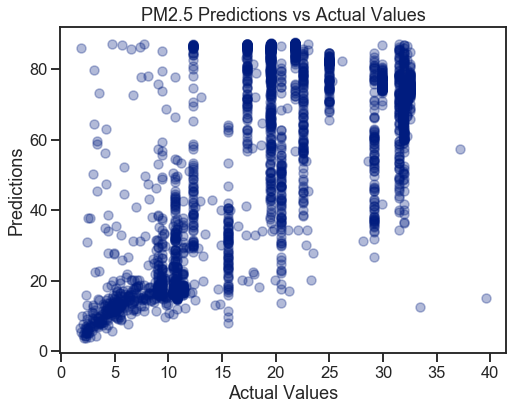

In [298]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
fig_deep_lstm_predictions_vs_actual_scatter = plt.figure(figsize=(8,6))
ax_fig_deep_lstm_predictions_vs_actual_scatter = fig_deep_lstm_predictions_vs_actual_scatter.add_subplot(111)
ax = ax_fig_deep_lstm_predictions_vs_actual_scatter
# we are going to use y_test, y_test_pred
ax.scatter(pollution_real_test, deep_lstm_model_predictions, alpha=.3)

ax.set(xlabel='Actual Values', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Actual Values');

fig_deep_lstm_predictions_vs_actual_scatter.savefig(os.path.join(filepath, 'deep_lstm_model_predictions_vs_actual_values_scatter.png'))

### saving results to file

In [299]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM: {} \n Deep LSTM : {}, \n metrics {}"
              .format(svr_rmse.round(2),svr_mae.round(2), basic_lstm_model_evaluation, deep_lstm_model_evaluation, model.metrics_names ), file=text_file)